In [71]:
import matplotlib.pyplot as plt
import pandas as pd
import yellowbrick

In [72]:
df = pd.read_csv('nfl_all.csv')

In [73]:
df.head(10)

,W,L,CONF,Playoffs,Cmp,Att,Yds,IAY,IAY/PA,CAY,CAY/Cmp,CAY/PA,YAC,YAC/Cmp,Rush_Att,Rush_Yds,1D,YBC,YBC/Att,YAC.1,YAC/Att,BrkTkl,Att/Br,D_Att,D_Cmp,D_Yds,D_TD,DADOT,Air,D_YAC,Bltz,Bltz%,Hrry,Hrry%,QBKD,QBKD%,Sk,Prss,Prss%,MTkl
0,11,6,NFC,1,415,591,4276,4459,7.5,2340,5.6,4.0,2279,5.5,496,2076,127,1286,2.6,790,1.6,28,17.7,561,367,3645,30,7.4,2317,1784,210,33.60%,61,9.80%,60,10.70%,41,162,25.90%,110
1,7,10,NFC,0,377,573,3713,4127,7.2,2252,6.0,3.9,1735,4.6,393,1451,75,811,2.1,640,1.6,19,20.7,577,391,3952,31,7.3,2143,1905,154,24.50%,48,7.60%,39,6.80%,18,105,16.70%,120
2,8,9,AFC,0,396,611,3961,5239,8.6,2552,6.4,4.2,1715,4.3,517,2479,159,1579,3.1,900,1.7,31,16.7,621,397,4742,31,8.4,2500,2467,209,31.10%,58,8.60%,62,10.00%,34,154,23.00%,115
3,11,6,AFC,1,415,655,4284,5364,8.2,2690,6.5,4.1,1760,4.2,461,2209,134,1208,2.6,1001,2.2,40,11.5,530,297,2771,12,7.0,1724,1916,157,26.00%,93,15.40%,51,9.60%,42,186,30.80%,118
4,5,12,NFC,0,348,599,3239,4434,7.4,1751,5.0,2.9,1822,5.2,455,1842,117,1036,2.3,806,1.8,31,14.7,515,337,3266,26,7.8,1957,1602,192,33.70%,62,10.90%,48,9.30%,39,149,26.10%,106
5,6,11,NFC,0,332,542,3207,4468,8.2,2026,6.1,3.7,1609,4.8,475,2018,119,1217,2.6,801,1.7,37,12.8,477,314,3257,31,8.0,1934,1685,123,22.60%,46,8.40%,31,6.50%,49,126,23.10%,106
6,10,7,AFC,1,384,555,4403,4357,7.9,2357,6.1,4.2,2449,6.4,436,1742,96,963,2.2,779,1.8,36,12.1,626,420,4222,26,8.1,3118,2455,142,20.50%,75,10.80%,53,8.50%,42,170,24.50%,108
7,8,9,AFC,0,320,520,3320,4231,8.1,1864,5.8,3.6,1755,5.5,485,2471,138,1261,2.6,1210,2.5,44,11.0,576,367,3439,29,7.4,1800,1912,141,22.10%,59,9.30%,53,9.20%,43,155,24.30%,118
8,12,5,NFC,1,444,647,4800,5073,7.8,2697,6.1,4.2,2266,5.1,473,2119,111,1245,2.6,874,1.8,19,24.9,612,364,4049,24,8.0,2131,2364,184,27.10%,79,11.60%,68,11.10%,41,188,27.60%,106
9,7,10,AFC,0,354,541,3593,4555,8.4,2115,6.0,3.9,1741,4.9,455,2025,123,1055,2.3,970,2.1,52,8.8,562,341,3652,22,8.3,1994,1907,160,25.30%,83,13.10%,45,8.00%,36,164,25.90%,84


In [74]:
df.columns

Index(['W', 'L', 'CONF', 'Playoffs', 'Cmp', 'Att', 'Yds', 'IAY', 'IAY/PA',
       'CAY', 'CAY/Cmp', 'CAY/PA', 'YAC', 'YAC/Cmp', 'Rush_Att', 'Rush_Yds',
       '1D', 'YBC', 'YBC/Att', 'YAC.1', 'YAC/Att', 'BrkTkl', 'Att/Br', 'D_Att',
       'D_Cmp', 'D_Yds', 'D_TD', 'DADOT', 'Air', 'D_YAC', 'Bltz', 'Bltz%',
       'Hrry', 'Hrry%', 'QBKD', 'QBKD%', 'Sk', 'Prss', 'Prss%', 'MTkl'],
      dtype='object')

In [75]:
print("Describe Data")
print(df.describe())
print("Summarized Data")
print(df.describe(include=['O']))

Describe Data
                W           L    Playoffs         Cmp         Att  \
count  128.000000  128.000000  128.000000  128.000000  128.000000   
mean     8.085938    8.085938    0.406250  364.609375  564.484375   
std      3.107084    3.061129    0.493062   44.920093   59.842442   
min      1.000000    2.000000    0.000000  257.000000  406.000000   
25%      6.000000    6.000000    0.000000  331.000000  520.750000   
50%      8.000000    8.000000    0.000000  370.000000  570.500000   
75%     11.000000   10.000000    1.000000  392.500000  606.250000   
max     14.000000   15.000000    1.000000  492.000000  731.000000   

               Yds          IAY      IAY/PA          CAY     CAY/Cmp  \
count   128.000000   128.000000  128.000000   128.000000  128.000000   
mean   3821.859375  4496.015625    7.965625  2181.414062    5.989844   
std     574.505905   649.137295    0.818048   375.879138    0.768764   
min    2523.000000  2995.000000    6.200000  1461.000000    4.100000   
25% 

In [76]:
# Create features variable to use in analysis
features = ['W', 'L', 'Playoffs', 'Yds', 'IAY/PA', 'CAY/PA', 'YAC/Cmp', 'Rush_Att', 'Rush_Yds', 'YBC/Att', 'D_Yds', 'D_TD',
       'DADOT', 'Air', 'D_YAC', 'Bltz', 'Hrry', 'Sk', 'Prss', 'MTkl']

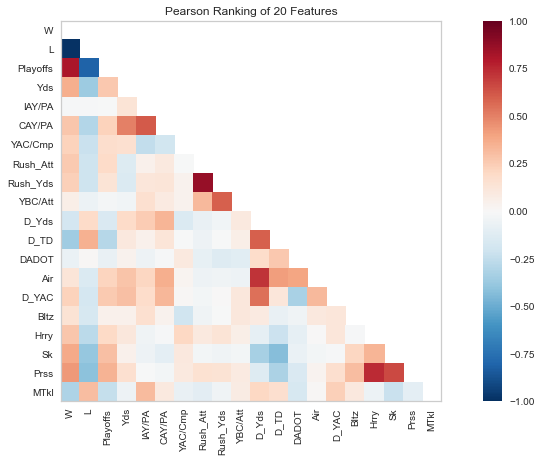

In [77]:
#Pearson Ranking
#set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)

# import the package for visulization of the correlation
from yellowbrick.features import Rank2D

# extract the numpy arrays from the data frame
X = df[features].values

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof(outpath="teams.png") # Draw/show/poof the data
plt.show()

Text(0, 0.5, 'Team Wins')

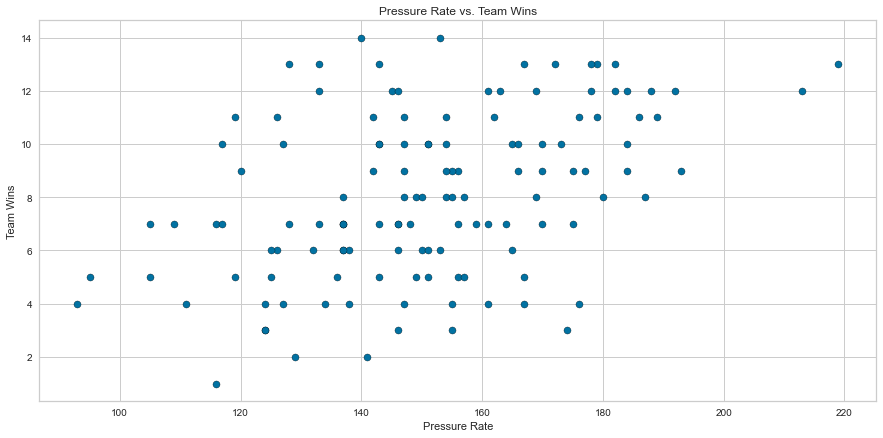

In [78]:
# Scatterplot of Prss vs. W
plt.scatter(df['Prss'], df['W'], s=50, edgecolor='black')
plt.title('Pressure Rate vs. Team Wins')
plt.xlabel('Pressure Rate')
plt.ylabel('Team Wins')

Text(0, 0.5, 'Team Wins')

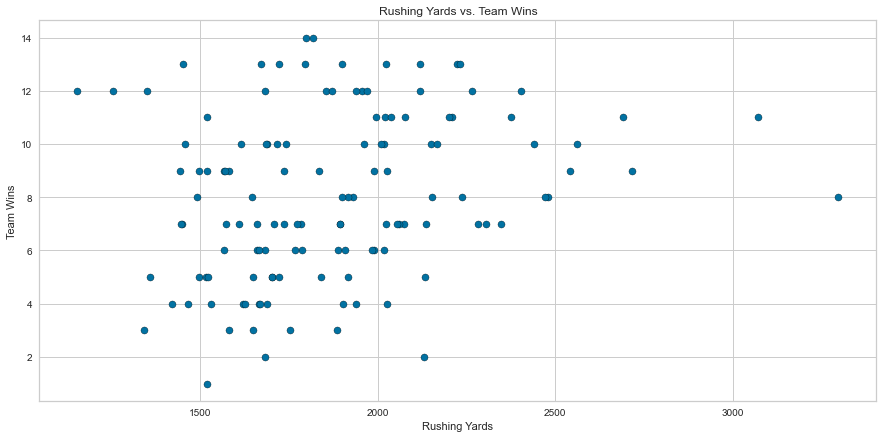

In [79]:
# Scatterplot of Prss vs. W
plt.scatter(df['Rush_Yds'], df['W'], s=50, edgecolor='black')
plt.title('Rushing Yards vs. Team Wins')
plt.xlabel('Rushing Yards')
plt.ylabel('Team Wins')

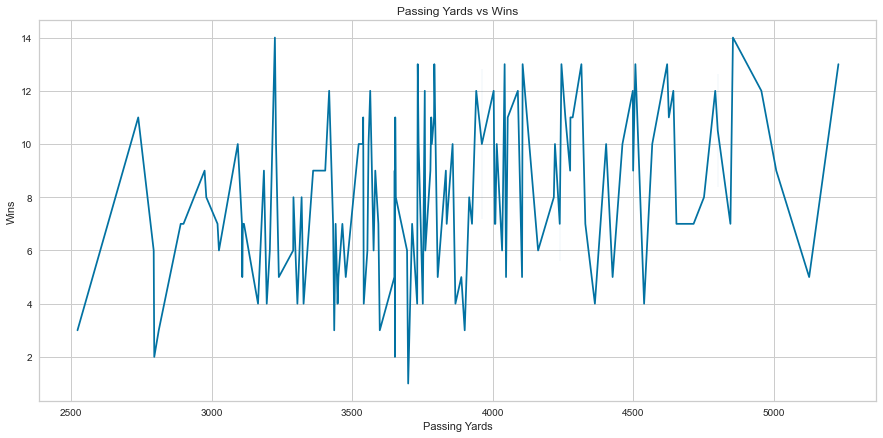

In [80]:
import seaborn as sns
# Line chart of Passing Yards vs. Wins
ax = sns.lineplot(data=df, x="Yds", y="W", ci="sd")
ax.set(xlabel='Passing Yards', ylabel='Wins', title='Passing Yards vs Wins')
plt.show()

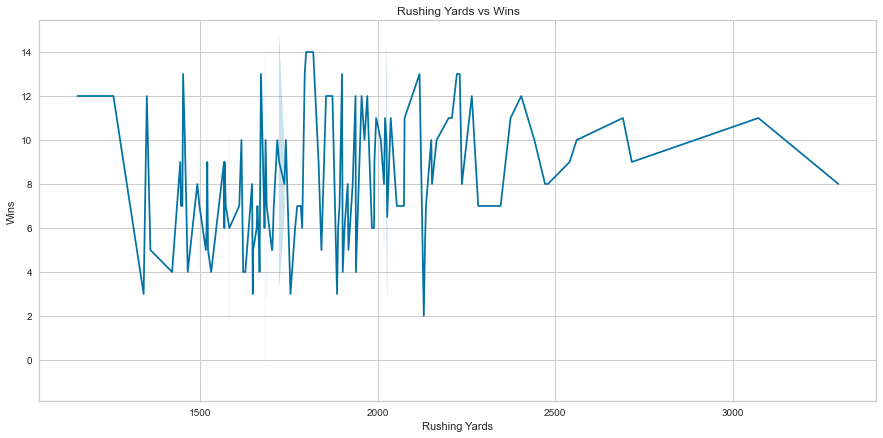

In [81]:
# Line chart of Rushing Yards vs. Wins
ax = sns.lineplot(data=df, x="Rush_Yds", y="W", ci="sd")
ax.set(xlabel='Rushing Yards', ylabel='Wins', title='Rushing Yards vs Wins')
plt.show()

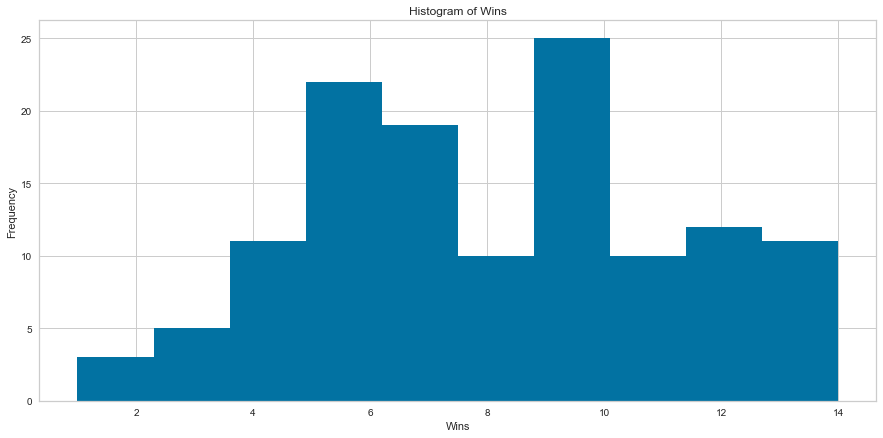

In [82]:
df.W.hist()
plt.title('Histogram of Wins')
plt.xlabel('Wins')
plt.ylabel('Frequency')
plt.savefig('hist_wins')

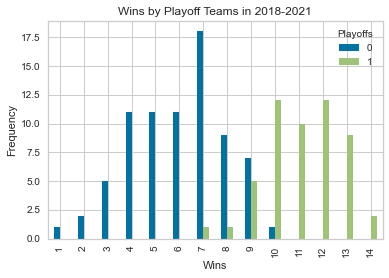

In [83]:
%matplotlib inline
pd.crosstab(df.W,df.Playoffs).plot(kind='bar')
plt.title('Wins by Playoff Teams in 2018-2021')
plt.xlabel('Wins')
plt.ylabel('Frequency')
plt.savefig('playoff_wins')

In [208]:
df_AFC = df[df["CONF"] =="AFC"]

In [209]:
df_AFC.head(10)

,W,L,CONF,Playoffs,Cmp,Att,Yds,IAY,IAY/PA,CAY,CAY/Cmp,CAY/PA,YAC,YAC/Cmp,Rush_Att,Rush_Yds,1D,YBC,YBC/Att,YAC.1,YAC/Att,BrkTkl,Att/Br,D_Att,D_Cmp,D_Yds,D_TD,DADOT,Air,D_YAC,Bltz,Bltz%,Hrry,Hrry%,QBKD,QBKD%,Sk,Prss,Prss%,MTkl
2,8,9,AFC,0,396,611,3961,5239,8.6,2552,6.4,4.2,1715,4.3,517,2479,159,1579,3.1,900,1.7,31,16.7,621,397,4742,31,8.4,2500,2467,209,31.10%,58,8.60%,62,10.00%,34,154,23.00%,115
3,11,6,AFC,1,415,655,4284,5364,8.2,2690,6.5,4.1,1760,4.2,461,2209,134,1208,2.6,1001,2.2,40,11.5,530,297,2771,12,7.0,1724,1916,157,26.00%,93,15.40%,51,9.60%,42,186,30.80%,118
6,10,7,AFC,1,384,555,4403,4357,7.9,2357,6.1,4.2,2449,6.4,436,1742,96,963,2.2,779,1.8,36,12.1,626,420,4222,26,8.1,3118,2455,142,20.50%,75,10.80%,53,8.50%,42,170,24.50%,108
7,8,9,AFC,0,320,520,3320,4231,8.1,1864,5.8,3.6,1755,5.5,485,2471,138,1261,2.6,1210,2.5,44,11.0,576,367,3439,29,7.4,1800,1912,141,22.10%,59,9.30%,53,9.20%,43,155,24.30%,118
9,7,10,AFC,0,354,541,3593,4555,8.4,2115,6.0,3.9,1741,4.9,455,2025,123,1055,2.3,970,2.1,52,8.8,562,341,3652,22,8.3,1994,1907,160,25.30%,83,13.10%,45,8.00%,36,164,25.90%,84
12,4,13,AFC,0,354,546,3305,3978,7.3,1892,5.3,3.5,1738,4.9,420,1422,77,730,1.7,692,1.6,15,28.0,546,363,4117,27,8.5,2597,1745,117,19.50%,53,8.80%,39,7.10%,32,124,20.70%,124
13,9,8,AFC,0,324,521,3361,4004,7.7,1931,6.0,3.7,1657,5.1,499,2540,154,1340,2.7,1200,2.4,37,13.5,597,390,3980,32,7.7,2323,1848,134,20.20%,37,5.60%,50,8.40%,33,120,18.10%,90
14,3,14,AFC,0,361,604,3436,4772,7.9,2031,5.6,3.4,1643,4.6,392,1755,92,1121,2.9,634,1.6,18,21.8,543,377,3875,24,7.6,2247,1864,190,31.50%,65,10.80%,49,9.00%,32,146,24.20%,130
15,12,5,AFC,1,448,675,4791,4965,7.4,2209,4.9,3.3,2728,6.1,431,1955,119,1339,3.1,616,1.4,14,30.8,610,401,4273,27,7.4,2469,2793,190,28.10%,88,13.00%,59,9.70%,31,178,26.40%,93
16,10,7,AFC,1,429,628,4567,5118,8.1,2521,5.9,4.0,2287,5.3,414,1617,95,924,2.2,693,1.7,28,14.8,606,400,3789,29,8.5,2410,1801,82,12.10%,62,9.20%,68,11.20%,35,165,24.40%,109


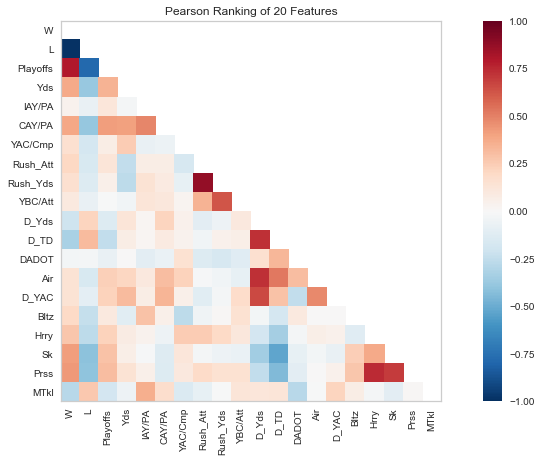

In [210]:
#Pearson Ranking
#set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)

# import the package for visulization of the correlation
from yellowbrick.features import Rank2D

# extract the numpy arrays from the data frame
X = df_AFC[features].values

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof(outpath="teams_AFC.png") # Draw/show/poof the data
plt.show()

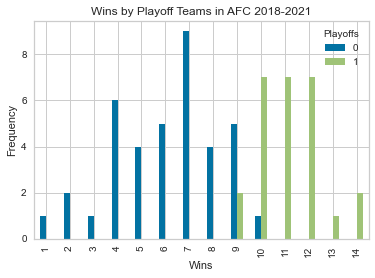

In [211]:
%matplotlib inline
pd.crosstab(df_AFC.W,df_AFC.Playoffs).plot(kind='bar')
plt.title('Wins by Playoff Teams in AFC 2018-2021')
plt.xlabel('Wins')
plt.ylabel('Frequency')
plt.savefig('playoff_wins_AFC')

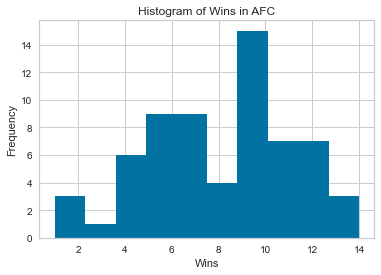

In [212]:
df_AFC.W.hist()
plt.title('Histogram of Wins in AFC')
plt.xlabel('Wins')
plt.ylabel('Frequency')
plt.savefig('hist_wins_AFC')

In [213]:
df_NFC = df[df["CONF"] =="NFC"]

In [214]:
df_NFC.head(10)

,W,L,CONF,Playoffs,Cmp,Att,Yds,IAY,IAY/PA,CAY,CAY/Cmp,CAY/PA,YAC,YAC/Cmp,Rush_Att,Rush_Yds,1D,YBC,YBC/Att,YAC.1,YAC/Att,BrkTkl,Att/Br,D_Att,D_Cmp,D_Yds,D_TD,DADOT,Air,D_YAC,Bltz,Bltz%,Hrry,Hrry%,QBKD,QBKD%,Sk,Prss,Prss%,MTkl
0,11,6,NFC,1,415,591,4276,4459,7.5,2340,5.6,4.0,2279,5.5,496,2076,127,1286,2.6,790,1.6,28,17.7,561,367,3645,30,7.4,2317,1784,210,33.60%,61,9.80%,60,10.70%,41,162,25.90%,110
1,7,10,NFC,0,377,573,3713,4127,7.2,2252,6.0,3.9,1735,4.6,393,1451,75,811,2.1,640,1.6,19,20.7,577,391,3952,31,7.3,2143,1905,154,24.50%,48,7.60%,39,6.80%,18,105,16.70%,120
4,5,12,NFC,0,348,599,3239,4434,7.4,1751,5.0,2.9,1822,5.2,455,1842,117,1036,2.3,806,1.8,31,14.7,515,337,3266,26,7.8,1957,1602,192,33.70%,62,10.90%,48,9.30%,39,149,26.10%,106
5,6,11,NFC,0,332,542,3207,4468,8.2,2026,6.1,3.7,1609,4.8,475,2018,119,1217,2.6,801,1.7,37,12.8,477,314,3257,31,8.0,1934,1685,123,22.60%,46,8.40%,31,6.50%,49,126,23.10%,106
8,12,5,NFC,1,444,647,4800,5073,7.8,2697,6.1,4.2,2266,5.1,473,2119,111,1245,2.6,874,1.8,19,24.9,612,364,4049,24,8.0,2131,2364,184,27.10%,79,11.60%,68,11.10%,41,188,27.60%,106
10,3,13,NFC,0,396,593,3598,3781,6.4,1792,4.5,3.0,2092,5.3,427,1886,104,1153,2.7,733,1.7,26,16.4,544,359,4160,31,8.7,2458,1896,165,27.30%,65,10.70%,29,5.30%,30,124,20.50%,132
11,13,4,NFC,1,402,593,4315,4587,7.7,2125,5.3,3.6,2401,6.0,446,1900,109,1016,2.3,884,2.0,32,13.9,603,379,3724,31,8.4,2072,2059,146,21.30%,77,11.30%,51,8.50%,39,167,24.40%,87
18,12,5,NFC,1,406,607,4642,5132,8.5,2754,6.8,4.5,2139,5.3,420,1683,99,945,2.3,738,1.8,19,22.1,625,416,4109,17,7.6,2680,2758,188,26.60%,74,10.50%,37,5.90%,50,161,22.80%,119
20,8,9,NFC,0,398,604,4238,4838,8.0,2513,6.3,4.2,1937,4.9,449,1930,103,1096,2.4,834,1.9,33,13.6,626,401,4300,29,8.1,2441,2212,186,26.10%,91,12.70%,45,7.20%,51,187,26.20%,109
22,9,8,NFC,0,293,504,3186,3705,7.4,1752,6.0,3.5,1685,5.8,510,1991,113,1197,2.3,794,1.6,40,12.8,592,369,3821,20,8.6,2143,1988,148,22.00%,56,8.30%,64,10.80%,46,166,24.70%,108


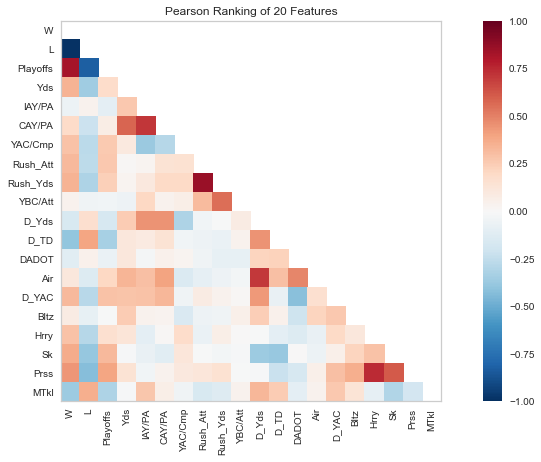

In [215]:
#Pearson Ranking
#set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)

# import the package for visulization of the correlation
from yellowbrick.features import Rank2D

# extract the numpy arrays from the data frame
X = df_NFC[features].values

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof(outpath="teams_NFC.png") # Draw/show/poof the data
plt.show()

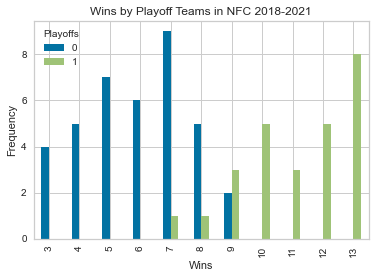

In [216]:
%matplotlib inline
pd.crosstab(df_NFC.W,df_NFC.Playoffs).plot(kind='bar')
plt.title('Wins by Playoff Teams in NFC 2018-2021')
plt.xlabel('Wins')
plt.ylabel('Frequency')
plt.savefig('playoff_wins_NFC')

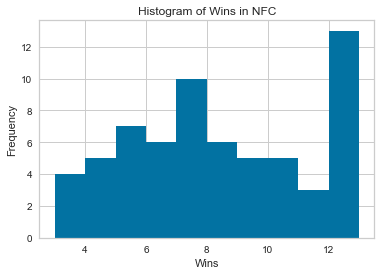

In [217]:
df_NFC.W.hist()
plt.title('Histogram of Wins in NFC')
plt.xlabel('Wins')
plt.ylabel('Frequency')
plt.savefig('hist_wins_AFC')

In [218]:
#Import packages
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

In [219]:
df_AFC.shape

(64, 40)

In [220]:
df_NFC.shape

(64, 40)

In [221]:

df['Playoffs'].value_counts()


0    76
1    52
Name: Playoffs, dtype: int64

0 = No Playoffs

1 = Made Playoffs

In [222]:
pd.set_option('display.max_columns', None)
df.groupby('Playoffs').mean()

,W,L,Cmp,Att,Yds,IAY,IAY/PA,CAY,CAY/Cmp,CAY/PA,YAC,YAC/Cmp,Rush_Att,Rush_Yds,1D,YBC,YBC/Att,YAC.1,YAC/Att,BrkTkl,Att/Br,D_Att,D_Cmp,D_Yds,D_TD,DADOT,Air,D_YAC,Bltz,Hrry,QBKD,Sk,Prss,MTkl
Playoffs,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,6.000000,10.118421,358.842105,566.789474,3695.684211,4522.000000,7.968421,2142.552632,5.951316,3.765789,1838.763158,5.132895,421.052632,1835.750000,101.802632,1019.578947,2.414474,816.171053,1.932895,27.947368,16.764474,554.355263,361.684211,3873.460526,27.500000,8.272368,2257.447368,1860.355263,170.947368,62.684211,45.276316,36.368421,144.328947,110.934211
1,11.134615,5.115385,373.038462,561.115385,4006.269231,4458.038462,7.961538,2238.211538,6.046154,4.013462,1990.596154,5.340385,441.230769,1931.769231,113.634615,1070.557692,2.400000,861.211538,1.951923,29.615385,16.215385,579.288462,368.884615,3746.442308,24.326923,8.163462,2399.692308,1997.730769,175.961538,68.403846,50.711538,41.769231,160.884615,102.807692


In [223]:
pd.set_option('display.max_columns', None)
df_AFC.groupby('Playoffs').mean()

,W,L,Cmp,Att,Yds,IAY,IAY/PA,CAY,CAY/Cmp,CAY/PA,YAC,YAC/Cmp,Rush_Att,Rush_Yds,1D,YBC,YBC/Att,YAC.1,YAC/Att,BrkTkl,Att/Br,D_Att,D_Cmp,D_Yds,D_TD,DADOT,Air,D_YAC,Bltz,Hrry,QBKD,Sk,Prss,MTkl
Playoffs,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,6.105263,10.052632,350.052632,556.236842,3584.289474,4413.289474,7.934211,2029.210526,5.784211,3.644737,1825.973684,5.223684,426.657895,1866.552632,104.052632,1021.842105,2.381579,844.710526,1.965789,27.684211,17.092105,548.131579,354.526316,3848.684211,26.763158,8.357895,2236.184211,1864.421053,171.368421,61.210526,46.947368,34.578947,142.736842,112.921053
1,11.153846,5.076923,367.653846,560.730769,3997.653846,4521.384615,8.103846,2252.000000,6.184615,4.053846,1957.076923,5.311538,440.653846,1916.538462,112.307692,1060.307692,2.376923,856.230769,1.934615,30.000000,15.784615,577.961538,363.884615,3730.653846,24.000000,8.242308,2385.423077,1995.192308,182.038462,68.038462,49.269231,39.884615,157.192308,106.500000


In [224]:
pd.set_option('display.max_columns', None)
df_NFC.groupby('Playoffs').mean()

,W,L,Cmp,Att,Yds,IAY,IAY/PA,CAY,CAY/Cmp,CAY/PA,YAC,YAC/Cmp,Rush_Att,Rush_Yds,1D,YBC,YBC/Att,YAC.1,YAC/Att,BrkTkl,Att/Br,D_Att,D_Cmp,D_Yds,D_TD,DADOT,Air,D_YAC,Bltz,Hrry,QBKD,Sk,Prss,MTkl
Playoffs,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,5.894737,10.184211,367.631579,577.342105,3807.078947,4630.710526,8.002632,2255.894737,6.118421,3.886842,1851.552632,5.042105,415.447368,1804.947368,99.552632,1017.315789,2.447368,787.631579,1.900000,28.210526,16.436842,560.578947,368.842105,3898.236842,28.236842,8.186842,2278.710526,1856.289474,170.526316,64.157895,43.605263,38.157895,145.921053,108.947368
1,11.115385,5.153846,378.423077,561.500000,4014.884615,4394.692308,7.819231,2224.423077,5.907692,3.973077,2024.115385,5.369231,441.807692,1947.000000,114.961538,1080.807692,2.423077,866.192308,1.969231,29.230769,16.646154,580.615385,373.884615,3762.230769,24.653846,8.084615,2413.961538,2000.269231,169.884615,68.769231,52.153846,43.653846,164.576923,99.115385


In [225]:
df_AFC.columns

Index(['W', 'L', 'CONF', 'Playoffs', 'Cmp', 'Att', 'Yds', 'IAY', 'IAY/PA',
       'CAY', 'CAY/Cmp', 'CAY/PA', 'YAC', 'YAC/Cmp', 'Rush_Att', 'Rush_Yds',
       '1D', 'YBC', 'YBC/Att', 'YAC.1', 'YAC/Att', 'BrkTkl', 'Att/Br', 'D_Att',
       'D_Cmp', 'D_Yds', 'D_TD', 'DADOT', 'Air', 'D_YAC', 'Bltz', 'Bltz%',
       'Hrry', 'Hrry%', 'QBKD', 'QBKD%', 'Sk', 'Prss', 'Prss%', 'MTkl'],
      dtype='object')

In [226]:
#Drop columns that we are trying to predict ("Wins") and columns that we don't need in the training.

X_AFC = df_AFC.drop(['W', 'L', 'Playoffs', 'IAY/PA', 'YBC/Att', 'CONF', 'MTkl', 'Air', 'Bltz%', 'Hrry%', 'QBKD%', 'Prss%', 'DADOT', 'BrkTkl', 'D_TD', 'D_Yds', 'D_Cmp', 'Att/Br', 'D_Att', 'D_YAC', 'YBC/Att', 'Bltz' ], axis=1)
Y_AFC = df_AFC['W']

In [227]:
#Drop columns that we are trying to predict ("Wins") and columns that we don't need in the training.

X_NFC = df_NFC.drop(['W', 'L', 'Playoffs', 'IAY/PA', 'YBC/Att', 'CONF', 'MTkl', 'Air', 'Bltz%', 'Hrry%', 'QBKD%', 'Prss%', 'DADOT', 'BrkTkl', 'D_TD', 'D_Yds', 'D_Cmp', 'Att/Br', 'D_Att', 'D_YAC', 'YBC/Att', 'Bltz',], axis=1)
Y_NFC = df_NFC['W']

In [228]:
X_AFC.shape

(64, 19)

In [229]:
Y_AFC.shape

(64,)

In [230]:
X_NFC.shape

(64, 19)

In [231]:
Y_NFC.shape

(64,)

In [232]:
#Use train, test, split method to separate training and test set
x_train, x_test, y_train, y_test = train_test_split(X_AFC, Y_AFC, test_size=0.2, random_state=2)

In [233]:
x_train

,Cmp,Att,Yds,IAY,CAY,CAY/Cmp,CAY/PA,YAC,YAC/Cmp,Rush_Att,Rush_Yds,1D,YBC,YAC.1,YAC/Att,Hrry,QBKD,Sk,Prss
51,370,559,3736,4264,2282,6.2,4.1,1655,4.5,428,1688,100,1075,613,1.4,56,54,41,151
16,429,628,4567,5118,2521,5.9,4.0,2287,5.3,414,1617,95,924,693,1.7,62,68,35,165
17,443,674,4800,5100,2627,5.9,3.9,2387,5.4,423,1834,112,1135,699,1.7,68,53,35,156
24,357,603,3541,4354,1967,5.5,3.3,1992,5.6,380,1667,87,938,729,1.9,55,50,33,138
119,299,524,3165,4648,1836,6.1,3.5,1568,5.2,410,1622,84,755,867,2.1,62,54,39,155
56,292,499,2796,4243,1599,5.5,3.2,1516,5.2,406,1683,94,871,812,2.0,57,53,31,141
109,432,644,4461,4857,2622,6.1,4.1,1973,4.6,408,1718,110,940,778,1.9,60,29,38,127
35,410,596,4620,5133,2859,7.0,4.8,1927,4.7,411,1723,119,794,929,2.3,50,55,38,143
122,459,689,5008,5327,2353,5.1,3.4,2821,6.1,345,1445,88,788,657,1.9,71,52,52,175
87,323,521,3111,4065,1693,5.2,3.2,1750,5.4,395,1447,75,571,876,2.2,50,52,35,137


In [234]:
x_test

,Cmp,Att,Yds,IAY,CAY,CAY/Cmp,CAY/PA,YAC,YAC/Cmp,Rush_Att,Rush_Yds,1D,YBC,YAC.1,YAC/Att,Hrry,QBKD,Sk,Prss
73,312,504,3115,3483,1697,5.4,3.4,1704,5.5,409,1662,76,963,699,1.7,62,35,40,137
2,396,611,3961,5239,2552,6.4,4.2,1715,4.3,517,2479,159,1579,900,1.7,58,62,34,154
102,331,542,3290,4278,1919,5.8,3.5,1650,5.0,359,1682,92,947,735,2.0,75,42,34,151
116,378,574,4258,4489,2229,5.9,3.9,2176,5.8,478,2037,162,1213,824,1.7,71,53,30,154
46,387,616,3699,4847,2248,5.8,3.6,1707,4.4,337,1519,80,756,763,2.3,41,57,18,116
105,367,588,3695,4372,2116,5.8,3.6,1814,4.9,393,1907,107,1142,765,1.9,53,40,44,137
71,318,539,3554,4628,2022,6.4,3.8,1825,5.7,396,1990,109,1289,701,1.8,62,38,38,138
53,283,440,2890,2995,1578,5.6,3.6,1546,5.5,502,2346,143,1394,952,1.9,79,43,24,146
108,345,506,3781,4287,2412,7.0,4.8,1753,5.1,472,2021,101,1227,794,1.7,93,43,43,179
66,289,440,3225,3822,1903,6.6,4.3,1447,5.0,386,1819,82,1205,614,1.6,44,59,37,140


In [235]:
scaler = StandardScaler()

In [236]:
x_train = scaler.fit_transform(x_train)

In [237]:
x_test = scaler.transform(x_test)

In [238]:
print(X_AFC.shape, x_train.shape, x_test.shape)

(64, 19) (51, 19) (13, 19)


In [239]:
#Call linear regression model
regr = LinearRegression()

In [240]:
#Fitting training data
regr.fit(x_train, y_train)

LinearRegression()

In [241]:
y_predict = regr.predict(x_test)

In [242]:
y_predict

array([ 6.38689188,  7.42316569,  4.90281592, 10.96294543,  3.96723128,
        7.50753782,  7.48106691,  8.34038699,  8.13620683, 11.46406209,
        8.98003574, 12.77437603, 10.88274248])

In [243]:
y_predict[5]

7.507537822622606

In [244]:
y_test[3]

11

In [245]:
from sklearn.metrics import r2_score

In [246]:
# Making Predictions of y_value
y_train_pred = regr.predict(x_train)
y_test_pred = regr.predict(x_test)

# Comparing the r2 value of both train and test data
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.6707731728921112
0.6831440808112412


In [247]:
#Check coefficient of determination of model
regr.score(x_test, y_test)

0.6831440808112412

In [248]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error: 1.5920936869450437
Mean Squared Error: 3.431043385298393
Root Mean Squared Error: 1.852307583879738


In [249]:
#Use train, test, split method to separate training and test set
x_train_NFC, x_test_NFC, y_train_NFC, y_test_NFC = train_test_split(X_NFC, Y_NFC, test_size=0.2, random_state=2)

In [250]:
x_train_NFC

,Cmp,Att,Yds,IAY,CAY,CAY/Cmp,CAY/PA,YAC,YAC/Cmp,Rush_Att,Rush_Yds,1D,YBC,YAC.1,YAC/Att,Hrry,QBKD,Sk,Prss
57,334,598,3327,5319,2227,6.7,3.7,1501,4.5,403,2027,114,1239,788,2.0,56,62,49,167
22,293,504,3186,3705,1752,6.0,3.5,1685,5.8,510,1991,113,1197,794,1.6,56,64,46,166
23,351,593,3196,4332,1854,5.3,3.1,1609,4.6,419,1688,90,1040,648,1.5,59,41,34,134
28,324,495,3432,4625,2072,6.4,4.2,1743,5.4,413,2074,106,1169,905,2.2,75,50,34,159
123,331,532,3867,3722,1931,5.8,3.6,2316,7.0,423,1902,98,1033,869,2.1,95,44,37,176
60,388,563,3941,4834,2404,6.2,4.3,1841,4.7,411,1971,111,1275,696,1.7,70,66,46,182
107,392,640,4238,5656,2436,6.2,3.8,2193,5.6,333,1667,97,1089,578,1.7,78,24,44,146
33,408,628,4363,5412,2976,7.3,4.7,1644,4.0,409,1532,86,816,716,1.8,71,61,29,161
125,408,625,5125,6635,3574,8.8,5.7,1784,4.4,389,1523,80,849,674,1.7,39,42,38,119
91,331,478,3792,3124,1837,5.5,3.8,2192,6.6,366,1453,90,704,749,2.0,88,36,48,172


In [251]:
x_test_NFC

,Cmp,Att,Yds,IAY,CAY,CAY/Cmp,CAY/PA,YAC,YAC/Cmp,Rush_Att,Rush_Yds,1D,YBC,YAC.1,YAC/Att,Hrry,QBKD,Sk,Prss
72,388,597,4751,5539,2984,7.7,5.0,1918,4.9,449,2153,120,1041,1112,2.5,61,49,39,149
0,415,591,4276,4459,2340,5.6,4.0,2279,5.5,496,2076,127,1286,790,1.6,61,60,41,162
100,378,563,3836,4169,2022,5.3,3.6,2049,5.4,416,2136,117,1231,905,2.2,68,25,35,128
121,422,599,4275,4379,2390,5.7,4.0,2134,5.1,398,1570,97,821,749,1.9,75,65,44,184
50,392,590,4014,3937,1938,4.9,3.3,2245,5.7,473,2018,123,1220,798,1.7,45,49,53,147
104,356,527,3538,3978,1993,5.6,3.8,1892,5.3,439,1963,128,1164,799,1.8,77,50,39,166
69,371,580,3291,4533,2029,5.5,3.5,1544,4.2,393,1901,90,851,1050,2.7,80,45,32,157
59,371,570,4033,3770,2023,5.5,3.5,2297,6.2,437,1889,101,1105,784,1.8,68,39,30,137
106,375,574,3576,3982,1797,4.8,3.1,2047,5.5,404,1660,91,883,777,1.9,54,28,43,125
64,355,554,3477,4127,1911,5.4,3.4,1886,5.3,362,1361,84,801,560,1.5,52,44,40,136


In [252]:
x_train_NFC = scaler.fit_transform(x_train_NFC)

In [253]:
x_test_NFC = scaler.transform(x_test_NFC)

In [254]:
print(X_NFC.shape, x_train_NFC.shape, x_test_NFC.shape)

(64, 19) (51, 19) (13, 19)


In [255]:
#Fitting training data
regr.fit(x_train_NFC, y_train_NFC)

LinearRegression()

In [256]:
y_predict_NFC = regr.predict(x_test_NFC)

In [257]:
y_predict_NFC[3]

9.880822519183996

In [258]:
y_test_NFC[1]

7

In [259]:
# Making Predictions of y_value
y_train_pred = regr.predict(x_train_NFC)
y_test_pred = regr.predict(x_test_NFC)

# Comparing the r2 value of both train and test data
print(r2_score(y_train_NFC,y_train_pred))
print(r2_score(y_test_NFC,y_test_pred))

0.771862235636209
-0.1373603114124582


In [260]:
#Check coefficient of determination of model
regr.score(x_test_NFC, y_test_NFC)

-0.1373603114124582

In [261]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_NFC, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_NFC, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_NFC, y_test_pred)))

Mean Absolute Error: 1.7034932490388701
Mean Squared Error: 4.105265029358578
Root Mean Squared Error: 2.0261453623465857
